<a href="https://colab.research.google.com/github/DarkArbiterr/EksploracjaMasywnychZbiorowDanych-Projekt/blob/main/PROJEKT_EMZD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zadanie Bazowe - Próbkowanie


---


Dane: **Zbiór rekomendacji**
1.   Wczytać dane. Uwaga, bag of words zaczyna się od znaku %. W zbiorze znajdują się wyniki z dwóch serwisów: należy wybrać jeden. (odnosi się do danych **Zbiór musiXmatch**).
2.   Zaimplementować technikę próbkowania proporcjonalnego strumienia. Zastosować haszowanie po użytkownikach.
3.  Pobrać 10% próbkę danych i na tej podstawie stworzyć histogram liczby odsłuchań
dla uzyskanej próbki użytkowników.



###Import danych i bibliotek

In [ ]:
import pandas as pd
import hashlib
import random

In [ ]:
dane = pd.read_csv('/content/drive/MyDrive/Dane do analiz/kaggle_visible_evaluation_triplets.txt', sep='\t', header=None)

In [ ]:
dane.columns = ('User','Song','PlayCount')

In [ ]:
dane

,User,Song,PlayCount
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


array([[<Axes: title={'center': 'PlayCount'}>]], dtype=object)

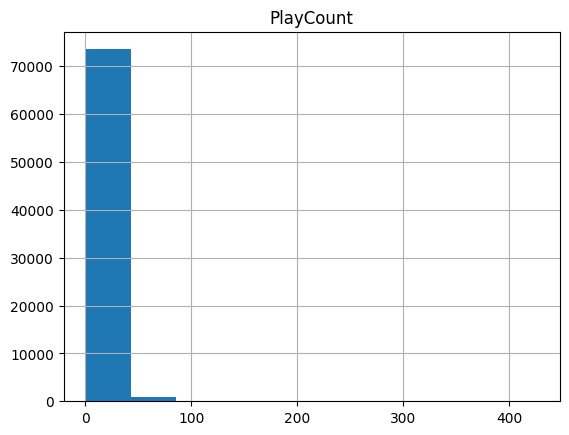

In [ ]:
dane10 = dane.sample(frac=0.1)
dane10[['User', 'PlayCount']].groupby(by='User').sum().hist()

###Funkcja hashująca

In [ ]:
def ToBucket(x):
  return int(hashlib.md5(str(x).encode()).hexdigest(), 16) %10

###Próbkowanie, histogram

In [ ]:
dane['HashedUser'] = dane["User"].map(ToBucket)

In [ ]:
sample_hash = dane[dane['HashedUser'] == 0]

array([[<Axes: title={'center': 'PlayCount'}>]], dtype=object)

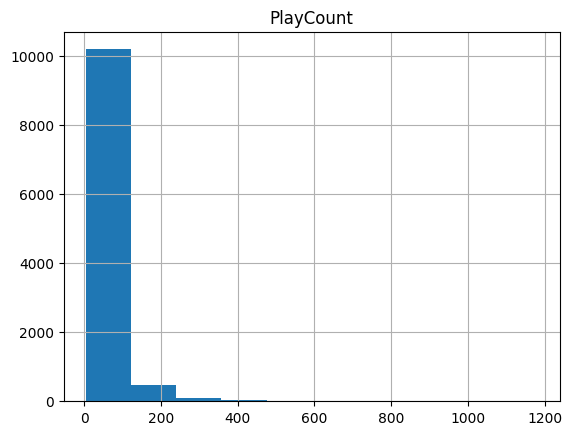

In [ ]:
sample_hash[['User', 'PlayCount']].groupby(by='User').sum().hist()

#Zadanie - Szukanie elementów podobnych


---


Dane: **Zbiór musiXmatch**
1. Wczytaj dane.
2. Korzystając z algorytmu Minhash LSH, dla zadanego utworu odnaleźć utwory
podobne.

Uwaga:
1. Dane są w formacie bag of words. Należy z tego zbioru wyrzucić stopwords i
uporządkować słowa malejąco względem częstotliwości wystąpień.
2. Dla testów można wybrać jakąś charakterystyczną piosenkę, np. świąteczną i zbadać
czy utwory podobne też są w tej tematyce.
3. Shinglety warto wygenerować po słowach.

###Przygotowanie danych

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Wczytanie pliku z słowami piosenek

In [ ]:
bagOfWords = []
songs = []
with open("/content/drive/MyDrive/Dane do analiz/mxm_dataset_train.txt", 'r') as file:
  for line in file:
    if line[0] == '%':
      bagOfWords = line[1:].split(',')
    if line[0] == '#':
      continue
    if line[0] == 'T':
      data = line.split(',', 2)
      songs.append(data)

Czyszczenie ze stopwords - znalezienie indeksów stopwords w naszym bagOfWords, nastepnie zapisanie wszystkich wyrazów w postaci listy z pominieciem stopwords

In [ ]:
def Cleaning(words):
  indexes = []
  for i, word in enumerate(words):
    if word in stopwords:
      indexes.append(i+1)
  return indexes

In [ ]:
stopwordsIndexes = Cleaning(bagOfWords)

In [ ]:
for song in songs:
  words = []
  wordCount = song[2].split(',')
  for line in wordCount:
    index, count = line.split(':')
    if int(index) not in stopwordsIndexes:
      for c in range(int(count)):
        words.append(bagOfWords[int(index)-1])
  song[2] = words

In [ ]:
data = pd.DataFrame(songs, columns=['track_id', 'mxm_track_id', 'words'])

In [ ]:
data['words']

0         [like, like, de, got, would, seem, someon, und...
1         [know, know, know, know, know, time, time, tim...
2         [love, love, love, love, love, love, love, lov...
3         [know, got, got, got, feel, let, would, would,...
4         [like, take, would, wo, someth, stay, burn, bu...
                                ...                        
210514    [que, que, que, que, que, que, que, de, en, te...
210515    [time, la, get, eye, think, give, dream, wo, w...
210516    [know, like, like, like, time, get, get, get, ...
210517    [get, get, get, get, get, get, get, get, get, ...
210518    [know, know, time, time, time, go, go, go, go,...
Name: words, Length: 210519, dtype: object

Zliczenie słów każdej piosenki i posortowanie malejąco

In [ ]:
from collections import Counter

In [ ]:
data['words'] = data['words'].apply(lambda x: Counter(x))

In [ ]:
data['words']

0         {'like': 2, 'de': 1, 'got': 1, 'would': 1, 'se...
1         {'know': 5, 'time': 3, 'la': 7, 'get': 2, 'got...
2         {'love': 11, 'like': 1, 'time': 6, 'come': 4, ...
3         {'know': 1, 'got': 3, 'feel': 1, 'let': 1, 'wo...
4         {'like': 1, 'take': 1, 'would': 1, 'wo': 1, 's...
                                ...                        
210514    {'que': 7, 'de': 1, 'en': 1, 'te': 5, 'tu': 4,...
210515    {'time': 1, 'la': 1, 'get': 1, 'eye': 1, 'thin...
210516    {'know': 1, 'like': 3, 'time': 1, 'get': 3, 'n...
210517    {'get': 21, 'got': 3, 'let': 6, 'would': 2, 'a...
210518    {'know': 2, 'time': 3, 'go': 7, 'get': 8, 'let...
Name: words, Length: 210519, dtype: object

In [ ]:
data['words'] = data['words'].apply(lambda x: sorted(x.items(), key=lambda item: item[1], reverse=True))

In [ ]:
data

,track_id,mxm_track_id,words
0,TRAAAAV128F421A322,4623710,"[(like, 2), (poor, 2), (order, 2), (captur, 2)..."
1,TRAAABD128F429CF47,6477168,"[(la, 7), (soul, 7), (know, 5), (heart, 5), (d..."
2,TRAAAED128E0783FAB,2516445,"[(love, 11), (make, 10), (way, 9), (find, 8), ..."
3,TRAAAEF128F4273421,3759847,"[(girl, 17), (someth, 13), (everi, 9), (got, 3..."
4,TRAAAEW128F42930C0,3783760,"[(burn, 11), (bodi, 7), (mix, 3), (like, 1), (..."
...,...,...,...
210514,TRZZZWS128F429CF87,3080645,"[(que, 7), (te, 5), (tu, 4), (vida, 4), (sus, ..."
210515,TRZZZXA128F428ED56,2344272,"[(wo, 2), (street, 2), (angel, 2), (citi, 2), ..."
210516,TRZZZXV128F4289747,1417347,"[(step, 7), (stone, 7), (need, 6), (stumbl, 5)..."
210517,TRZZZYV128F92E996D,6849828,"[(lie, 31), (get, 21), (outta, 15), (let, 6), ..."


Wczytanie pliku z danymi piosenek (artysta, nazwa)

In [ ]:
matches = []
with open("/content/drive/MyDrive/Dane do analiz/mxm_779k_matches.txt", 'r') as file:
  for line in file:
    if line[0] == '#':
      continue
    if line[0] == 'T':
      m = line.split("<SEP>")
      matches.append(m)

In [ ]:
matchesData = pd.DataFrame(matches, columns=['dump','dump2','dump3','mxm_track_id', 'artist_name', 'title']).drop(['dump', 'dump2', 'dump3'], axis=1)

Połączenie tabel w jedną i usunięcie duplikatów

In [ ]:
completeData = pd.merge(data, matchesData, on='mxm_track_id', how='left')

In [ ]:
completeData = completeData.drop_duplicates(subset='mxm_track_id')

In [ ]:
completeData['title'] = completeData['title'].str.rstrip('\n')

<ipython-input-19-d23e8e1e10bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completeData['title'] = completeData['title'].str.rstrip('\n')


In [ ]:
completeData

,track_id,mxm_track_id,words,artist_name,title
0,TRAAAAV128F421A322,4623710,"[(like, 2), (poor, 2), (order, 2), (captur, 2)...",Western Addiction,A Poor Recipe for Civic Cohesion
1,TRAAABD128F429CF47,6477168,"[(la, 7), (soul, 7), (know, 5), (heart, 5), (d...",The Box Tops,Soul Deep
2,TRAAAED128E0783FAB,2516445,"[(love, 11), (make, 10), (way, 9), (find, 8), ...",Jamie Cullum,It's About Time
3,TRAAAEF128F4273421,3759847,"[(girl, 17), (someth, 13), (everi, 9), (got, 3...",Adam Ant,Something Girls
4,TRAAAEW128F42930C0,3783760,"[(burn, 11), (bodi, 7), (mix, 3), (like, 1), (...",Broken Spindles,Burn My Body
...,...,...,...,...,...
265348,TRZZZWS128F429CF87,3080645,"[(que, 7), (te, 5), (tu, 4), (vida, 4), (sus, ...",Los Prisioneros,Que no destrocen tu vida
265349,TRZZZXA128F428ED56,2344272,"[(wo, 2), (street, 2), (angel, 2), (citi, 2), ...",The God Awfuls,No Angels
265350,TRZZZXV128F4289747,1417347,"[(step, 7), (stone, 7), (need, 6), (stumbl, 5)...",Blackhawk,Stepping Stones
265351,TRZZZYV128F92E996D,6849828,"[(lie, 31), (get, 21), (outta, 15), (let, 6), ...",TLC,Dear Lie


In [ ]:
!pip install pandas datasketch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
from datasketch import MinHash, MinHashLSH

###Wybranie próbki do testów

In [ ]:
partData = completeData.head(10000)

In [ ]:
partData

,track_id,mxm_track_id,words,artist_name,title
0,TRAAAAV128F421A322,4623710,"[(like, 2), (poor, 2), (order, 2), (captur, 2)...",Western Addiction,A Poor Recipe for Civic Cohesion
1,TRAAABD128F429CF47,6477168,"[(la, 7), (soul, 7), (know, 5), (heart, 5), (d...",The Box Tops,Soul Deep
2,TRAAAED128E0783FAB,2516445,"[(love, 11), (make, 10), (way, 9), (find, 8), ...",Jamie Cullum,It's About Time
3,TRAAAEF128F4273421,3759847,"[(girl, 17), (someth, 13), (everi, 9), (got, 3...",Adam Ant,Something Girls
4,TRAAAEW128F42930C0,3783760,"[(burn, 11), (bodi, 7), (mix, 3), (like, 1), (...",Broken Spindles,Burn My Body
...,...,...,...,...,...
12693,TRBFALD12903CFF2F9,4743362,"[(night, 6), (hate, 4), (carri, 4), (dark, 3),...",The Devin Townsend Band,Vampira
12694,TRBFAMP128F427A41D,895138,"[(know, 5), (love, 4), (let, 4), (would, 4), (...",Che Fu,Catch One
12695,TRBFAMW128F429112E,2229794,"[(soul, 6), (deni, 5), (place, 4), (promis, 3)...",Suffocation,Souls to Deny
12696,TRBFANX128F42934C3,2447294,"[(love, 22), (time, 4), (say, 4), (whi, 4), (f...",3 of Hearts,Is It Love


###Wybranie piosenki świątecznej

In [ ]:
filtered_data = partData[partData['title'].str.contains('christmas', case=False)]

for track_id, title in zip(filtered_data['track_id'], filtered_data['title']):
    print(track_id, title)

TRAAQBF12903CF796B Have Yourself a Merry Little Christmas
TRABGLK128F9338730 We Wish You a Merry Christmas
TRABUDK128F14943F3 This Christmas
TRADFKO12903D055F4 The Christmas That Almost Wasn't
TRADHLA128F1492706 Last Christmas
TRAFXTD128F9335724 The Christmas Song
TRAGDWI128F429883D Christmas Wrapping
TRAGIJD128F92F1461 This Christmas
TRAGRYJ128F423932B Christmas in Prison
TRAHGPH128E0798892 Everything's Gonna Be Cool This Christmas
TRAJZVL128F9342662 Christmas Time
TRAKGFU128F14A96C2 Christmas Time
TRALFYK128E07926CB This Christmas (Hang All the Mistletoe)
TRAMIWA128F42982E3 Christmas Wrapping
TRAMTZA128F429525E Christmas Eve In My Home Town
TRANYFA128F148B063 The Christmas Song
TRAOCEA128F428A1E5 Snoopy's Christmas
TRAOLUA128F422BB1D Baby's First Christmas
TRAPKBI128F92F9D33 Christmas All Over Again
TRARUBF12903CBF4B2 That'll Be Christmas
TRASAQC128F426E52A White Christmas
TRASVNS128E07855BF Have Yourself a Merry Little Christmas
TRASZGK12903CE705D I'll Be Home for Christmas
TRAUOJR1

In [ ]:
song = partData.loc[partData['track_id'] == 'TRADHLA128F1492706']

In [ ]:
song

,track_id,mxm_track_id,words,artist_name,title
1431,TRADHLA128F1492706,6775862,"[(gave, 16), (someon, 10), (give, 9), (christm...",Ashley Tisdale,Last Christmas


###Funkcja do generowania shingletów po słowach

In [ ]:
def generate_shingles(words, shingleSize):
    shingles = set()
    for i in range(len(words) - shingleSize + 1):
        shingle = tuple(words[i:i+shingleSize])
        shingles.add(shingle)
    return shingles

###Algorytm MinHashLSH

In [ ]:
lsh = MinHashLSH(threshold=0.2, num_perm=128)

In [ ]:
shingleSize = 2 # Rozmiar shingletu
minhashes = {}
shingles_list = []
for index, row in partData.iterrows():
    track_id = row['track_id']
    words = row['words']

    word_list = [word[0] for word in words] # Lista słów, bez licznika

    # Generowanie shingletów
    shingles = generate_shingles(word_list, shingleSize)
    shingles_list.append(shingles)

    # Generowanie wpisu w LSH
    minhash = MinHash(num_perm=128)
    for shingle in shingles:
        shingle_str = ' '.join(shingle)
        minhash.update(shingle_str.encode('utf8'))
    minhashes[track_id] = minhash
    lsh.insert(track_id, minhash)

# Dodawanie shingli jako nowej kolumny w partData
partData['shingles'] = shingles_list

<ipython-input-31-554db2300f05>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partData['shingles'] = shingles_list


In [ ]:
partData

,track_id,mxm_track_id,words,artist_name,title,shingles
0,TRAAAAV128F421A322,4623710,"[(like, 2), (poor, 2), (order, 2), (captur, 2)...",Western Addiction,A Poor Recipe for Civic Cohesion,"{(lifeless, arrang), (piec, damn), (river, met..."
1,TRAAABD128F429CF47,6477168,"[(la, 7), (soul, 7), (know, 5), (heart, 5), (d...",The Box Tops,Soul Deep,"{(find, wast), (look, thing), (get, never), (g..."
2,TRAAAED128E0783FAB,2516445,"[(love, 11), (make, 10), (way, 9), (find, 8), ...",Jamie Cullum,It's About Time,"{(higher, edg), (lone, chanc), (pretti, differ..."
3,TRAAAEF128F4273421,3759847,"[(girl, 17), (someth, 13), (everi, 9), (got, 3...",Adam Ant,Something Girls,"{(girl, someth), (shine, white), (smile, shine..."
4,TRAAAEW128F42930C0,3783760,"[(burn, 11), (bodi, 7), (mix, 3), (like, 1), (...",Broken Spindles,Burn My Body,"{(wet, numb), (made, use), (numb, rust), (grey..."
...,...,...,...,...,...,...
12693,TRBFALD12903CFF2F9,4743362,"[(night, 6), (hate, 4), (carri, 4), (dark, 3),...",The Devin Townsend Band,Vampira,"{(follow, get), (night, hate), (believ, tonigh..."
12694,TRBFAMP128F427A41D,895138,"[(know, 5), (love, 4), (let, 4), (would, 4), (...",Che Fu,Catch One,"{(yes, touch), (polic, coffe), (4, x), (let, w..."
12695,TRBFAMW128F429112E,2229794,"[(soul, 6), (deni, 5), (place, 4), (promis, 3)...",Suffocation,Souls to Deny,"{(consum, piti), (way, desir), (fruit, achiev)..."
12696,TRBFANX128F42934C3,2447294,"[(love, 22), (time, 4), (say, 4), (whi, 4), (f...",3 of Hearts,Is It Love,"{(realli, forev), (close, came), (love, time),..."


###Wyszukiwanie piosenek podobnych do wybranej

In [ ]:
song_minhash = minhashes['TRADHLA128F1492706']

similar_songs = lsh.query(song_minhash)

for track_id in similar_songs:
  if track_id != 'TRADHLA128F1492706':  # Pomijanie wybranej piosenki
    similar_song = partData.loc[partData['track_id'] == track_id]
    artist = similar_song['artist_name'].values[0]
    title = similar_song['title'].values[0]
    jaccard = song_minhash.jaccard(minhashes[track_id])
    print(f"Artysta: {artist}, Tytuł: {title}, Stopień podobieństwa: {jaccard}")

Artysta: Atomic Opera, Tytuł: Jesus Junk, Stopień podobieństwa: 0.03125
Artysta: The Cooper Temple Clause, Tytuł: Take Comfort, Stopień podobieństwa: 0.03125


#Zadanie: Filtr Blooma


---


Dane: **Zbiór musiXmatch**
1. Wybrać kilka utworów (ok. 10) dowolnego artysty.
2. Stworzyć filtr Blooma bazujący na pierwszych 10 słowach z tych utworów (uwaga,
trzeba dobrać odpowiednio parametry). Należy z tego zbioru wyrzucić stopwords i
uporządkować słowa malejąco względem częstotliwości wystąpień. Można przetestować różne funkcje hashujące (i różną ich liczbę).
3. Przetworzyć strumień z danych i wskazać wszystkie elementy, które pasują do
wzorca.
4. Utwór uważamy za podobny do utworów danego artysty, jeśli k (np. 10) najczęściej
występujących słów znajduje się w filtrze Blooma.

Uwaga:
1. Proszę zwrócić uwagę na inicjalizację w strukturze bitarray . Struktura ta normalnie
nie inicjalizuje tablicy zerami tylko kopiuje istniejące obiekty.
2. Operacje bitowe pozwalają dogenerować bardzo szybko nowe hashe za pomocą tzw.
double hashing.


###Import bibliotek

In [ ]:
!pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.6/273.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
import hashlib
import math
from bitarray import bitarray
import pandas as pd

###Klasa Filtru Blooma

In [ ]:
class BloomFilterSimple:
    def __init__(self, size, hash_functions):
      self.size = size
      self.bit_array = bytearray(size)
      self.hash_functions = hash_functions

    def add(self, item):
      for fn in self.hash_functions:
        # Wyliczenie indeksu na podstawie funkcji haszującej i rozmiaru tablicy bitów
        index = fn(item) % self.size
        # Ustawienie bitu na wartość 1, oznaczając obecność elementu w filtrze
        self.bit_array[index] = 1

    def __contains__(self, item):
      # Sprawdzenie, czy wszystkie bity są ustawione na 1
      return all(self.bit_array[fn(item) % self.size] for fn in self.hash_functions)

###Funkcje hashujące

In [ ]:
def hash_fn_1(item):
    return int(hashlib.md5(item.encode()).hexdigest(), 16)

def hash_fn_2(item):
    return int(hashlib.sha1(item.encode()).hexdigest(), 16)

def hash_fn_3(item):
    return int(hashlib.sha256(item.encode()).hexdigest(), 16)

###Wybór 10 piosenek artysty do testów

In [ ]:
artist_counts = partData['artist_name'].value_counts()
artist_counts.head(15)

Frank Sinatra                18
Willie Nelson                14
Johnny Cash                  14
Britney Spears               12
Nick Cave & The Bad Seeds    12
James Taylor                 12
Ella Fitzgerald              11
Bruce Springsteen            10
Elvis Presley                10
Bob Dylan                    10
Venom                        10
Céline Dion                   9
Red Hot Chili Peppers         9
Neil Young                    9
Michael Jackson               9
Name: artist_name, dtype: int64

In [ ]:
artist_name = 'Britney Spears'
artist_songs = partData[partData['artist_name'] == artist_name].head(10)

In [ ]:
artist_songs

,track_id,mxm_track_id,words,artist_name,title,shingles
1240,TRACYCJ128F9309246,978315,"[(door, 13), (go, 12), (like, 8), (better, 8),...",Britney Spears,Don't Go Knockin' on My Door,"{(say, back), (stronger, girlfriend), (histori..."
1760,TRAEBXS128F429933A,1601515,"[(boy, 22), (girl, 11), (one, 8), (let, 5), (h...",Britney Spears,Boys (feat. Pharrell Williams),"{(nice, meant), (life, back), (ca, live), (fee..."
1766,TRAECBR128F429F8C0,1752586,"[(see, 9), (babi, 8), (need, 8), (guess, 8), (...",Britney Spears,Everytime,"{(made, pleas), (caus, onli), (song, pain), (m..."
4978,TRAMAKV128F4298063,699576,"[(crazi, 12), (babi, 9), (oh, 8), (ohh, 8), (f...",Britney Spears,(You Drive Me) Crazy,"{(mean, ground), (lovin, feelin), (oh, ohh), (..."
5637,TRANQWW128F92FDB30,7783581,"[(mmm, 31), (papa, 28), (love, 19), (get, 7), ...",Britney Spears,Mmm Papi,"{(crazi, car), (tight, pressur), (ooh, doubt),..."
7397,TRARSKA128F9336A04,9123709,"[(em, 14), (2, 14), (1, 14), (3, 14), (count, ...",Britney Spears,3 (Groove Police club mix),"{(1, 3), (caught, mari), (come, see), (charm, ..."
8371,TRAUFLM128F42AECDC,4367948,"[(whi, 7), (ya, 7), (like, 6), (look, 4), (som...",Britney Spears,Someday (I Will Understand),"{(seat, bum), (everywher, punk), (give, onli),..."
10066,TRAYMNJ128F4299881,3721473,"[(babi, 28), (yeah, 26), (get, 12), (oh, 9), (...",Britney Spears,Chris Cox Megamix,"{(help, ride), (abov, drive), (like, ca), (sup..."
11000,TRBAUVN128F932FEF8,9972859,"[(yeah, 24), (babi, 10), (oh, 8), (got, 4), (t...",Britney Spears,Oops!... I Did It Again,"{(exist, problem), (abov, innoc), (sent, love)..."
11355,TRBBREF128F933CCDD,8439827,"[(oh, 23), (babi, 14), (see, 12), (want, 11), ...",Britney Spears,If You Seek Amy,"{(get, say), (babi, see), (caus, wait), (face,..."


###Tworzymy filtr Blooma na podstawie 10 słów z wybranych utworów

In [ ]:
k = 10  # Liczba najczęściej występujących słów, które muszą pasować
hash_functions_1 = [hash_fn_1]
hash_functions_2 = [hash_fn_1, hash_fn_2]
hash_functions_3 = [hash_fn_1, hash_fn_2, hash_fn_3]

Zmienne do przechowywania wyników

In [ ]:
similar_songs_1 = []
similar_songs_2 = []
similar_songs_3 = []

Tworzenie filtru Blooma

In [ ]:
bloom_filter_1 = BloomFilterSimple(100, hash_functions_1)
bloom_filter_2 = BloomFilterSimple(100, hash_functions_2)
bloom_filter_3 = BloomFilterSimple(100, hash_functions_3)

# Dodanie pierwszych 10 słów 10 piosenek do filtru
for words in artist_songs['words']:
    for word in words[:10]:
        bloom_filter_1.add(word[0])
        bloom_filter_2.add(word[0])
        bloom_filter_3.add(word[0])

# Utwór uważamy za podobny do utworów danego artysty, jeśli 10 najczęściej występujących słów znajduje się w filtrze Blooma.
for index, row in partData.iterrows():
  words = row['words']
  matching_words_1 = 0
  matching_words_2 = 0
  matching_words_3 = 0
  for word in words[:10]:
      if word[0] in bloom_filter_1:
          matching_words_1 += 1
      if word[0] in bloom_filter_2:
          matching_words_2 += 1
      if word[0] in bloom_filter_3:
          matching_words_3 += 1
      if matching_words_1 >= k:
          similar_songs_1.append((row['title'], row['artist_name']))
          break
      if matching_words_2 >= k:
          similar_songs_2.append((row['title'], row['artist_name']))
          break
      if matching_words_3 >= k:
          similar_songs_3.append((row['title'], row['artist_name']))
          break

###Wyniki dla 1, 2 i 3 funkcji hashujacych

In [ ]:
print("Ilość podobnych utworów dla 1 funkcji haszującej: ", len(similar_songs_1))
print("Tytuły i wykonawcy utworów podobnych dla 1 funkcji haszującej:")
for title, artist in similar_songs_1:
    print("Tytuł:", title, "\nWykonawca:", artist, "\n")
print()

Ilość podobnych utworów dla 1 funkcji haszującej:  136
Tytuły i wykonawcy utworów podobnych dla 1 funkcji haszującej:
Tytuł: The One and Only 
Wykonawca: Snoop Dogg 

Tytuł: U Killed It 
Wykonawca: Lily Allen 

Tytuł: Mary Lou 
Wykonawca: Rednex 

Tytuł: Up to You 
Wykonawca: David Kitt 

Tytuł: Drinkin' Problem 
Wykonawca: Lori McKenna 

Tytuł: Panda Bear 
Wykonawca: Owl City 

Tytuł: Hello Boys 
Wykonawca: Andrea Corr 

Tytuł: Count On Me 
Wykonawca: Billy Gilman 

Tytuł: Damaged 
Wykonawca: Queensrÿche 

Tytuł: I'm Not Done 
Wykonawca: Fever Ray 

Tytuł: 19 Minutes 
Wykonawca: Gareth Gates 

Tytuł: Help Me Make It Through the Night 
Wykonawca: Bobby Bare 

Tytuł: You Move Me 
Wykonawca: Susan Ashton 

Tytuł: Don't Go Knockin' on My Door 
Wykonawca: Britney Spears 

Tytuł: Sabotage 
Wykonawca: Cancer Bats 

Tytuł: Floodwater 
Wykonawca: Reckless Kelly 

Tytuł: Rice Dream Girl 
Wykonawca: Casiotone for the Painfully Alone 

Tytuł: Winner Takes It All 
Wykonawca: ABBA 

Tytuł: Waiting 

In [ ]:
print("Ilość podobnych utworów dla 2 funkcji haszujących: ", len(similar_songs_2))
print("Tytuły i wykonawcy utworów podobnych dla 2 funkcji haszujących:")
for title, artist in similar_songs_2:
    print("Tytuł:", title, "\nWykonawca:", artist, "\n")
print()

Ilość podobnych utworów dla 2 funkcji haszujących:  282
Tytuły i wykonawcy utworów podobnych dla 2 funkcji haszujących:
Tytuł: Tonight Will Be Alright 
Wykonawca: Lionel Richie 

Tytuł: Navy Brown 
Wykonawca: Gentleman Reg 

Tytuł: Drowning Man 
Wykonawca: Greenslade 

Tytuł: Teacher's Pet 
Wykonawca: Extreme 

Tytuł: Cat's in the Cradle 
Wykonawca: Judy Collins 

Tytuł: Fingers of Love 
Wykonawca: Crowded House 

Tytuł: Unashamed 
Wykonawca: Whitney Houston 

Tytuł: Can't Get Enough of Your Love, Babe 
Wykonawca: Barry White 

Tytuł: Don't Let Go 
Wykonawca: Weezer 

Tytuł: Turning Away 
Wykonawca: Mary Black 

Tytuł: Arruncha 
Wykonawca: El Otro Yo 

Tytuł: Shooting Stars 
Wykonawca: Cauterize 

Tytuł: Across the Avenue 
Wykonawca: Freedy Johnston 

Tytuł: We the Freed 
Wykonawca: Benediction 

Tytuł: The Good You Make 
Wykonawca: Emm Gryner 

Tytuł: Prego Amore 
Wykonawca: Erlend Øye 

Tytuł: Ballad of the Absent Mare 
Wykonawca: Leonard Cohen 

Tytuł: Free Love 
Wykonawca: Sandra 


In [ ]:
print("Ilość podobnych utworów dla 3 funkcji haszujących: ", len(similar_songs_3))
print("Tytuły i wykonawcy utworów podobnych dla 3 funkcji haszujących:")
for title, artist in similar_songs_3:
    print("Tytuł:", title, "\nWykonawca:", artist, "\n")
print()

Ilość podobnych utworów dla 3 funkcji haszujących:  221
Tytuły i wykonawcy utworów podobnych dla 3 funkcji haszujących:
Tytuł: Seek and Destroy 
Wykonawca: Jeff Foxworthy 

Tytuł: Reasons 
Wykonawca: UB40 

Tytuł: Let's Get It Started 
Wykonawca: The Black Eyed Peas 

Tytuł: The River in the Pines 
Wykonawca: Joan Baez 

Tytuł: Don't Cry 
Wykonawca: Neil Young 

Tytuł: Magic Flight 
Wykonawca: 2 Fabiola 

Tytuł: I Can't Help It 
Wykonawca: Adam Wade 

Tytuł: Bad News 
Wykonawca: Camouflage 

Tytuł: Filipino Baby 
Wykonawca: Hank Locklin 

Tytuł: Force of Nature 
Wykonawca: Sunshine Anderson 

Tytuł: I Know She Will 
Wykonawca: The Zombies 

Tytuł: Show Me What You Got 
Wykonawca: Blessed by a Broken Heart 

Tytuł: When a Man's in Love He Feels No Cold 
Wykonawca: Alasdair Roberts 

Tytuł: Suffocating Under Words of Sorrow (What Can I Do) 
Wykonawca: Bullet for My Valentine 

Tytuł: Danger 
Wykonawca: Third Eye Blind 

Tytuł: In a Big Country (live) 
Wykonawca: Big Country 

Tytuł: Pric

#Zadanie: Szukanie społeczności


---


Dane: **Zbiór rekomendacji**
1. Znajdź na podstawie danych społeczności, do których należą wybrani użytkownicy
(ok. 10 użytkowników) poprzez np. trawling, grupowanie spektralne.
2. W celu stworzenia grafu połączeń liczymy korelację Pearsona między dowolnymi
dwoma wierzchołkami i łączymy je krawędzią, jeśli jest mniejsza niż pewien parametr
(threshold).
3. Zwróćmy uwagę, że nie mamy danej wprost oceny tracków. Można ją stworzyć
wykorzystując liczbę odsłuchań i stosując np. krzywą sigmoidalną. Niestety zbiór
ten ma bardzo dużo zer, dlatego można losowo wypełnić (powiedzmy 5%) zer
ocenami z odpowiedniego zakresu.

Uwaga:
1. Korelację Pearsona należy liczyć tylko dla tych współrzędnych, dla których obydwa
wektory mają niezerowe wartości, np. pearsonr (x, y) dla x = [0, 4, 1, 0], y = [3,
0, 0, 2], wynosi 0, a nie −0.7337.

###Import bibliotek i danych

In [ ]:
import pandas as pd

In [ ]:
dane3 = pd.read_csv('/content/drive/MyDrive/Dane do analiz/kaggle_visible_evaluation_triplets.txt', sep='\t', header=None)

In [ ]:
dane3.columns = ('User','Song','PlayCount')

In [ ]:
dane3 = dane3.head(2000)

In [ ]:
dane3

,User,Song,PlayCount
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1995,3d9770424788037e7dbfa9044e23126fc7947edc,SOQPXER12A670205F0,1
1996,3d9770424788037e7dbfa9044e23126fc7947edc,SOSWFXR12A8C1433E4,1
1997,3d9770424788037e7dbfa9044e23126fc7947edc,SOVEFDV12AB01815B8,1
1998,3d9770424788037e7dbfa9044e23126fc7947edc,SORGUXE12A8C143E11,1


In [ ]:
import numpy as np
import random
from scipy.stats import pearsonr
from scipy.sparse import csr_matrix

###Stworzenie macierzy:
1. kolumny: piosenki
2. wiersze: użytkownicy
3. pola: liczba odsłuchań

In [ ]:
users = dane3['User'].unique()
songs = dane3['Song'].unique()

In [ ]:
user_index = {user: index for index, user in enumerate(users)}
song_index = {song: index for index, song in enumerate(songs)}

In [ ]:
adjacency_matrix = pd.DataFrame(0, index=users, columns=songs)

In [ ]:
for i, row in dane3.iterrows():
    user = row['User']
    song = row['Song']
    play_count = row['PlayCount']
    adjacency_matrix.loc[user, song] = play_count

In [ ]:
adjacency_matrix

,SOBONKR12A58A7A7E0,SOEGIYH12A6D4FC0E3,SOFLJQZ12A6D4FADA6,SOHTKMO12AB01843B0,SODQZCY12A6D4F9D11,SOXLOQG12AF72A2D55,SOUVUHC12A67020E3B,SOUQERE12A58A75633,SOIPJAX12A8C141A2D,SOEFCDJ12AB0185FA0,...,SOVRRWA12A6D4F9A91,SOVTLQW12AB0186641,SOWZBJH12A8C1345DA,SOARPVY12A6701EB00,SOUBXSF12A6701D23C,SOGRSUM12A8C13480A,SOQPXER12A670205F0,SOSWFXR12A8C1433E4,SOVEFDV12AB01815B8,SORGUXE12A8C143E11
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d7083f5e1d50c264277d624340edaaf3dc16095b,0,0,0,0,0,0,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
d68dc6fc25248234590d7668a11e3335534ae4b4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9be82340a8b5ef32357fe5af957ccd54736ece95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f12f89ba556ed9c561e5b14ddfa5790d79006a82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d6d0c7632cf83f30c03f196fba1a157793fbaa96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
026b3e52b951d2f091b975cc10e4846e36a33baa,0,0,0,0,0,0,0,0,0,0,...,4,1,1,2,1,0,0,0,0,0
3d9770424788037e7dbfa9044e23126fc7947edc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


###Uzupełnianie 20% zer wartościami z zakresu PlayCount

In [ ]:
num_zeros = int(0.2 * adjacency_matrix.size)
zero_indices = np.random.choice(adjacency_matrix.size, num_zeros, replace=False)
play_count_range = (dane3['PlayCount'].min(), dane3['PlayCount'].max())
for idx in zero_indices:
    row_idx, col_idx = np.unravel_index(idx, adjacency_matrix.shape)
    adjacency_matrix.iat[row_idx, col_idx] = random.randint(*play_count_range)

In [ ]:
adjacency_matrix

,SOBONKR12A58A7A7E0,SOEGIYH12A6D4FC0E3,SOFLJQZ12A6D4FADA6,SOHTKMO12AB01843B0,SODQZCY12A6D4F9D11,SOXLOQG12AF72A2D55,SOUVUHC12A67020E3B,SOUQERE12A58A75633,SOIPJAX12A8C141A2D,SOEFCDJ12AB0185FA0,...,SOVRRWA12A6D4F9A91,SOVTLQW12AB0186641,SOWZBJH12A8C1345DA,SOARPVY12A6701EB00,SOUBXSF12A6701D23C,SOGRSUM12A8C13480A,SOQPXER12A670205F0,SOSWFXR12A8C1433E4,SOVEFDV12AB01815B8,SORGUXE12A8C143E11
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,1,1,1,1,1,29,72,0,51,0,...,0,0,0,76,0,0,0,0,0,0
d7083f5e1d50c264277d624340edaaf3dc16095b,0,0,0,0,0,0,1,1,1,2,...,0,71,0,76,82,40,0,0,0,0
d68dc6fc25248234590d7668a11e3335534ae4b4,0,48,0,0,0,52,0,0,0,0,...,0,3,28,0,0,0,0,0,0,0
9be82340a8b5ef32357fe5af957ccd54736ece95,0,65,0,0,0,0,0,0,0,0,...,0,0,12,0,0,0,87,0,0,0
841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,0,0,0,0,0,45,0,62,0,0,...,0,0,0,0,75,0,0,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f12f89ba556ed9c561e5b14ddfa5790d79006a82,12,0,0,50,37,42,70,0,80,0,...,0,0,0,0,0,0,0,0,0,0
d6d0c7632cf83f30c03f196fba1a157793fbaa96,0,0,0,0,56,0,0,0,0,0,...,0,0,89,0,0,0,0,0,63,0
026b3e52b951d2f091b975cc10e4846e36a33baa,53,23,0,11,0,0,0,80,0,0,...,4,1,1,2,1,0,0,0,0,3
3d9770424788037e7dbfa9044e23126fc7947edc,0,51,0,0,66,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1


###Obliczenie ocen piosenek wykorzystując liczbę odsłuchań i stosując krzywą sigmoidalną.

In [ ]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [ ]:
ratings = sigmoid(adjacency_matrix)

In [ ]:
x = ratings.std()

In [ ]:
pd.DataFrame(x).describe()

,0
count,1781.000000
mean,0.198842
std,0.012519
min,0.141500
25%,0.191159
50%,0.199692
75%,0.207346
max,0.228575


In [ ]:
ratings

,SOBONKR12A58A7A7E0,SOEGIYH12A6D4FC0E3,SOFLJQZ12A6D4FADA6,SOHTKMO12AB01843B0,SODQZCY12A6D4F9D11,SOXLOQG12AF72A2D55,SOUVUHC12A67020E3B,SOUQERE12A58A75633,SOIPJAX12A8C141A2D,SOEFCDJ12AB0185FA0,...,SOVRRWA12A6D4F9A91,SOVTLQW12AB0186641,SOWZBJH12A8C1345DA,SOARPVY12A6701EB00,SOUBXSF12A6701D23C,SOGRSUM12A8C13480A,SOQPXER12A670205F0,SOSWFXR12A8C1433E4,SOVEFDV12AB01815B8,SORGUXE12A8C143E11
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,0.731059,0.731059,0.731059,0.731059,0.731059,1.0,1.000000,0.500000,1.000000,0.500000,...,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
d7083f5e1d50c264277d624340edaaf3dc16095b,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.731059,0.731059,0.731059,0.880797,...,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000
d68dc6fc25248234590d7668a11e3335534ae4b4,0.500000,1.000000,0.500000,0.500000,0.500000,1.0,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.952574,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
9be82340a8b5ef32357fe5af957ccd54736ece95,0.500000,1.000000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.999994,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000
841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,0.500000,0.500000,0.500000,0.500000,0.500000,1.0,0.500000,1.000000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1.000000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f12f89ba556ed9c561e5b14ddfa5790d79006a82,0.999994,0.500000,0.500000,1.000000,1.000000,1.0,1.000000,0.500000,1.000000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
d6d0c7632cf83f30c03f196fba1a157793fbaa96,0.500000,0.500000,0.500000,0.500000,1.000000,0.5,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
026b3e52b951d2f091b975cc10e4846e36a33baa,1.000000,1.000000,0.500000,0.999983,0.500000,0.5,0.500000,1.000000,0.500000,0.500000,...,0.982014,0.731059,0.731059,0.880797,0.731059,0.500000,0.500000,0.500000,0.500000,0.952574
3d9770424788037e7dbfa9044e23126fc7947edc,0.500000,1.000000,0.500000,0.500000,1.000000,0.5,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.731059,0.731059,0.731059,0.731059,0.731059


###Zamiana na macierz rzadką

In [ ]:
ratings_csr = csr_matrix(ratings.values)

###Obliczenie macierzy korelacji

In [ ]:
from multiprocessing import Pool

In [ ]:
correlation_matrix = pd.DataFrame(index=users, columns=users)

Pary user-user-ocena

In [ ]:
user_pairs = [(user1, user2, ratings_csr) for user1 in users for user2 in users]

Funkcja do obliczania Korelacji Pearsona

In [ ]:
def calculate_correlation(user_pair):
    user1, user2, ratings_csr = user_pair
    ratings1 = ratings_csr[user_index[user1], :].toarray().flatten()
    ratings2 = ratings_csr[user_index[user2], :].toarray().flatten()

    # Maska do sprawdzania czy żaden z wektorów nie ma wartości = 0
    nonzero_mask = (ratings1 != 0) & (ratings2 != 0)

    # Jeśli wektory są niezerowe - wylicz korelację, w przeciwnym wypadku korelacja = 0
    if np.sum(nonzero_mask) > 0:
        correlation, _ = pearsonr(ratings1[nonzero_mask], ratings2[nonzero_mask])
    else:
        correlation = 0

    return (user1, user2, correlation)

Obliczanie korelacji dla każdej pary - zrównoleglone za pomocą *multiprocessing*




In [ ]:
with Pool() as pool:
    results = pool.map(calculate_correlation, user_pairs)
    for user1, user2, correlation in results:
        correlation_matrix.loc[user1, user2] = correlation
        correlation_matrix.loc[user2, user1] = correlation

In [ ]:
correlation_matrix

,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,d7083f5e1d50c264277d624340edaaf3dc16095b,d68dc6fc25248234590d7668a11e3335534ae4b4,9be82340a8b5ef32357fe5af957ccd54736ece95,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,458833ce4418010e61304b34b2c992e1cce63435,c34670d9c1718361feb93068a853cead3c95b76a,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,ef0d21935a2f8ae90571dbfab800f87fa5b38769,...,f506eba398381df61b46d54e2bb1c1df41e7253b,d9d3ae1a25007804abbba5499d3d1200982074bd,dd87b5cc43b72578298a6ffadfe8155c567f31b8,23901bd256ec6843e77e005b59c1bfe9cb2cd683,778e05c8586ff80e804d2815d7ffc1e583df98dd,f12f89ba556ed9c561e5b14ddfa5790d79006a82,d6d0c7632cf83f30c03f196fba1a157793fbaa96,026b3e52b951d2f091b975cc10e4846e36a33baa,3d9770424788037e7dbfa9044e23126fc7947edc,0bc51331375641805f2a097471b604d175004aca
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,1.0,-0.017961,-0.055321,-0.014995,-0.034616,0.000282,0.059539,-0.004748,0.032921,0.001401,...,0.006424,-0.00543,0.037187,-0.004807,-0.027519,-0.024637,0.008656,0.015214,0.02666,0.023255
d7083f5e1d50c264277d624340edaaf3dc16095b,-0.017961,1.0,-0.001728,0.013516,-0.029031,0.004595,0.024026,0.014521,-0.019366,-0.013366,...,0.024012,-0.030599,-0.030169,0.008932,0.013716,-0.015306,-0.0225,0.001577,-0.027283,0.015841
d68dc6fc25248234590d7668a11e3335534ae4b4,-0.055321,-0.001728,1.0,0.04203,-0.005291,-0.026276,-0.011604,-0.025924,-0.020508,-0.030306,...,-0.016833,-0.006327,0.003352,-0.017321,-0.042299,0.016509,0.042312,-0.041287,-0.047631,0.009132
9be82340a8b5ef32357fe5af957ccd54736ece95,-0.014995,0.013516,0.04203,1.0,0.011591,-0.041026,0.03583,0.021424,0.009765,-0.012929,...,-0.026169,-0.026421,0.013488,0.032259,-0.022801,0.043399,-0.023269,-0.01191,-0.033281,0.024235
841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,-0.034616,-0.029031,-0.005291,0.011591,1.0,0.021215,0.003449,-0.023799,0.043151,-0.008199,...,0.011022,-0.036776,0.01398,-0.036912,0.007935,-0.004509,0.023165,0.001919,0.012876,0.012459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f12f89ba556ed9c561e5b14ddfa5790d79006a82,-0.024637,-0.015306,0.016509,0.043399,-0.004509,-0.020647,-0.000312,-0.00052,0.022738,0.033441,...,-0.021792,-0.001229,-0.022591,-0.009486,-0.034006,1.0,0.00614,-0.006774,-0.012414,-0.000425
d6d0c7632cf83f30c03f196fba1a157793fbaa96,0.008656,-0.0225,0.042312,-0.023269,0.023165,0.014611,0.024553,-0.001561,-0.0138,-0.012098,...,-0.005187,0.023469,0.026694,-0.040556,0.012655,0.00614,1.0,0.040601,-0.008354,-0.014666
026b3e52b951d2f091b975cc10e4846e36a33baa,0.015214,0.001577,-0.041287,-0.01191,0.001919,-0.023354,0.004289,0.008714,-0.018618,-0.013433,...,0.040222,-0.001248,-0.002902,-0.023987,0.039567,-0.006774,0.040601,1.0,-0.014279,0.008774
3d9770424788037e7dbfa9044e23126fc7947edc,0.02666,-0.027283,-0.047631,-0.033281,0.012876,-0.024805,0.038708,0.024322,0.042752,0.004632,...,0.044471,-0.010477,0.033783,0.002736,-0.016868,-0.012414,-0.008354,-0.014279,1.0,0.002486


###Stworzenie grafu połączeń

In [ ]:
threshold = 0.01 # Próg połączenia

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Jeśli korelacja > treshold, to wtedy połącz tych użytkowników

In [ ]:
graph = nx.Graph()
for user1 in users:
    for user2 in users:
        correlation = correlation_matrix.loc[user1, user2]
        if user1 != user2 and abs(correlation) < threshold:
            graph.add_edge(user1, user2)

Wyświetlenie grafu

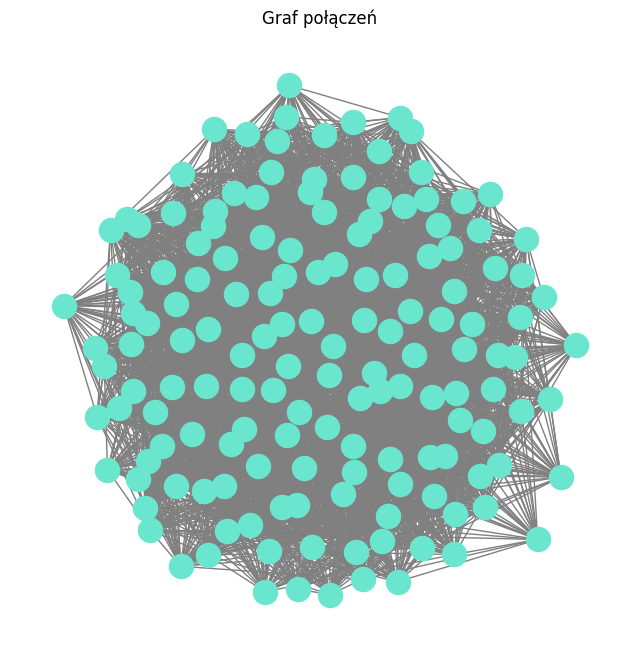

In [ ]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx(graph, pos, with_labels=False, node_color='#6ae6cf', edge_color='gray')
plt.title("Graf połączeń")
plt.axis('off')
plt.show()

###Funkcja do grupowania spektralnego

In [ ]:
def spectral_clustering(matrix):
    adjacency_matrix = nx.from_pandas_adjacency(matrix)
    laplacian = nx.laplacian_matrix(adjacency_matrix)
    L = laplacian.todense()
    eigenvalues, eigenvectors = np.linalg.eig(L)

    real_eigenvectors = np.real(eigenvectors)
    real_eigenvalues = np.real(eigenvalues)

    X = real_eigenvectors.T

    vector = X[1].tolist()

    md = np.median(vector)

    negative_nodes = [user for user, val in matrix.iterrows() if vector[matrix.index.get_loc(user)] <= md]
    positive_nodes = [user for user, val in matrix.iterrows() if vector[matrix.index.get_loc(user)] > md]

    return negative_nodes, positive_nodes

###Stworzenie dwóch społecznosci

Zrzutowanie grafu do DataFrame

In [ ]:
matrix = nx.adjacency_matrix(graph, nodelist=users)

In [ ]:
matrix = pd.DataFrame(matrix.toarray(), index=users, columns=users)

Wywołanie grupowania

In [ ]:
negative_nodes, positive_nodes = spectral_clustering(matrix)

###Testowanie

Wybieranie 10 losowych użytkowników

In [ ]:
random_users = random.sample(list(users), 10)

Wyświetlanie przynależności społecznościowych dla wybranych użytkowników

In [ ]:
for user in random_users:
    if user in negative_nodes:
        print(f"Użytkownik {user} należy do społeczności 0")
    elif user in positive_nodes:
        print(f"Użytkownik {user} należy do społeczności 1")

Użytkownik f4c64e7c47d5b99fe8b5e80ffdf88d162ecfb822 należy do społeczności 0
Użytkownik f506eba398381df61b46d54e2bb1c1df41e7253b należy do społeczności 1
Użytkownik bdbf8ddd82fa83ef4538a15298dfca19bfc4a3ca należy do społeczności 1
Użytkownik 9be82340a8b5ef32357fe5af957ccd54736ece95 należy do społeczności 1
Użytkownik fdf6afb5daefb42774617cf223475c6013969724 należy do społeczności 0
Użytkownik 799e2252b44242c1ebf1c6439a2c48a08658100f należy do społeczności 0
Użytkownik a42412a54fed82e8341d2edaa1f9001362acf898 należy do społeczności 0
Użytkownik 202c63cd3568680561e84d33bc35740d662efccf należy do społeczności 1
Użytkownik 9de45f3b754cdc54410f1b4529648bdff9c68fca należy do społeczności 1
Użytkownik e6533f7fcb62fe305d4e241adec7475c62c15ce5 należy do społeczności 1


Wizualizacja grafu z podziałem na społeczności

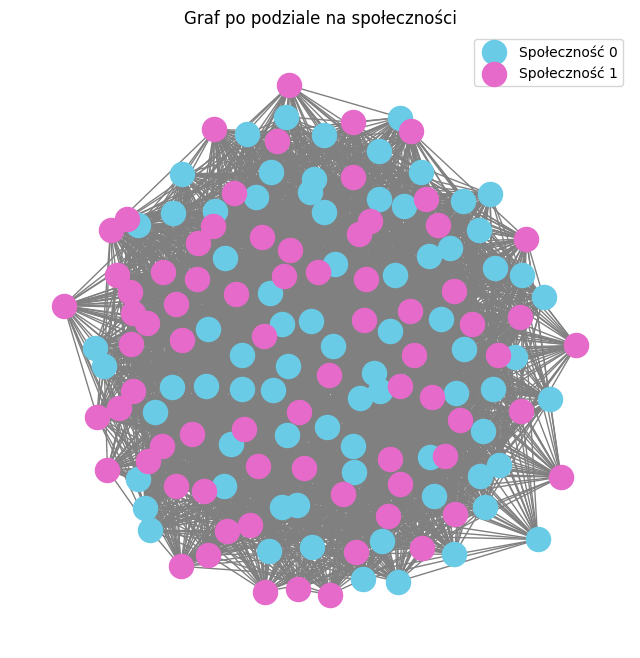

In [ ]:
plt.figure(figsize=(8, 8))

# Rysowanie węzłów społeczności 0
pos = nx.spring_layout(graph, seed=42)
nx.draw_networkx_nodes(graph, pos, nodelist=negative_nodes, node_color='#6acbe6', label='Społeczność 0')

# Rysowanie węzłów społeczności 1
nx.draw_networkx_nodes(graph, pos, nodelist=positive_nodes, node_color='#e66ac9', label='Społeczność 1')

# Rysowanie krawędzi
nx.draw_networkx_edges(graph, pos, edge_color='gray')

plt.title('Graf po podziale na społeczności')
plt.legend()
plt.axis('off')
plt.show()

#Zadanie: System rekomendacyjny
Dane: **Zbiór rekomendacji**
1. Stwórz system rekomendacyjny i przetestuj jego działanie.
2. System może być oparty o collaboration filtering. W tym celu należy zaimplementować SVD (dokładniej P QT
i znalezienie macierzy P i Q poprzez stochastyczny
spadek gradientowy).
3. Zwróćmy uwagę, że nie mamy danej wprost oceny tracków. Można ją stworzyć
wykorzystując liczbę odsłuchań i stosując np. krzywą sigmoidalną.
4. Na potrzeby zadania zakładamy, że są tylko dwie ukryte zmienne (tzn. rzutujemy
na 2 wymiarową podprzestrzeń).

Uwaga:
1. Ze względu na rozmiar danych może być konieczność zastosowania macierzy rzadkich.
2. Niestety zbiór danych ma bardzo dużo zer, dlatego można losowo wypełnić (powiedzmy 5%) zer ocenami z odpowiedniego zakresu lub przefiltrować i usunąć
użytkowników, ktorzy słabo kontrybuują i mają mało odsłuchań (lub niewielką
liczbę odsłuchanych utworów).

###Wyliczenie błędu

In [ ]:
def error(R, P, Q):
  err = 0
  for i in range(len(R)):
    for j in range(len(R[0])):
      if R[i][j] > 0:
        err = err + (R[i][j] - np.dot(P[i,:], Q[:,j]))**2
  return err

###Algorytm SVD (z regularyzacją)

In [ ]:
def matrix_factorization(R, K, steps=100, alpha=0.002, beta=0.02):
  # Przekształcenie macierzy R do macierzy rzadkiej w formacie CSR
  R2 = csr_matrix(R)
  # Inicjalizacja macierzy P i Q losowymi wartościami
  N, M = R.shape
  P = np.random.rand(N, K)
  Q = np.random.rand(K, M)
  # Algorytm stochastycznego spadku gradientowego
  for _ in range(steps):
    for i in range(N):
      for j in range(M):
        if R[i, j] > 0:
          eij = -2 * (R[i, j] - np.dot(P[i, :], Q[:, j]))
          for k in range(K):
            P[i][k] = P[i][k] - alpha * (eij * Q[k][j] * Q[k][j] + beta * P[i][k])
            Q[k][j] = Q[k][j] - alpha * (eij * P[i][k] * P[i][k] + beta * Q[k][j])
    if error(R, P, Q) < 0.06:
      break
  return P, Q

###Implementacja systemu rekomendacyjnego opartego na Collaborative Filtering

In [ ]:
def collaborative_filtering(matrix):
  # Zastosowanie SVD do uzyskania macierzy P i Q
  K = 2  # Liczba ukrytych zmiennych
  P, Q = matrix_factorization(matrix.values, K)

  predictions = np.dot(P, Q)

  # Przekształcenie macierzy predykcji do obiektu DataFrame z odpowiednimi indeksami i kolumnami
  predictions_df = pd.DataFrame(predictions, index=matrix.index, columns=matrix.columns)

  return predictions_df

###Wycięcie kawałka macierzy i wyzerowanie go w celu testowania

In [ ]:
ratingsCF = ratings.iloc[:151, :300]

In [ ]:
testRatings = ratingsCF.copy()
testRatings.iloc[0:30, 0:50] = 0

In [ ]:
ratingsCF_slice = ratingsCF.iloc[0:30, 0:50]

In [ ]:
ratingsCF

,SOBONKR12A58A7A7E0,SOEGIYH12A6D4FC0E3,SOFLJQZ12A6D4FADA6,SOHTKMO12AB01843B0,SODQZCY12A6D4F9D11,SOXLOQG12AF72A2D55,SOUVUHC12A67020E3B,SOUQERE12A58A75633,SOIPJAX12A8C141A2D,SOEFCDJ12AB0185FA0,...,SOSIOGC12A8C13A800,SOFEKBM12A6D4FCFC3,SOQJHUW12AB0188A24,SOUYBJG12A6D4FCFEC,SOSASFL12A6D4F7B02,SOVRGOO12A58A7AB4E,SOCGIHM12AB017DE4E,SOOZTJL12A58A80F4F,SOVOKZE12A6D4FABDE,SOXQXXU12A67021CC3
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,1.0,0.731059,0.731059,0.731059,0.731059,1.0,0.500000,1.000000,0.500000,0.982014,...,0.5,0.500000,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.5
d7083f5e1d50c264277d624340edaaf3dc16095b,0.5,0.500000,0.500000,1.000000,1.000000,0.5,0.731059,0.731059,0.731059,0.880797,...,0.5,0.999994,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
d68dc6fc25248234590d7668a11e3335534ae4b4,1.0,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5
9be82340a8b5ef32357fe5af957ccd54736ece95,1.0,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,...,0.5,0.500000,1.0,0.5,0.5,0.5,1.0,0.5,0.5,0.5
841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,1.0,0.500000,0.500000,0.500000,0.500000,0.5,0.993307,0.500000,0.500000,0.500000,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f12f89ba556ed9c561e5b14ddfa5790d79006a82,0.5,0.500000,1.000000,0.500000,0.500000,1.0,0.500000,0.500000,0.500000,1.000000,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,1.0,0.5,1.0
d6d0c7632cf83f30c03f196fba1a157793fbaa96,0.5,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,1.000000,1.000000,0.500000,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
026b3e52b951d2f091b975cc10e4846e36a33baa,0.5,1.000000,0.500000,0.500000,0.500000,0.5,0.500000,1.000000,0.500000,1.000000,...,0.5,0.500000,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5
3d9770424788037e7dbfa9044e23126fc7947edc,0.5,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,...,0.5,0.500000,0.5,0.5,0.5,0.5,1.0,0.5,0.5,0.5


In [ ]:
testRatings

,SOBONKR12A58A7A7E0,SOEGIYH12A6D4FC0E3,SOFLJQZ12A6D4FADA6,SOHTKMO12AB01843B0,SODQZCY12A6D4F9D11,SOXLOQG12AF72A2D55,SOUVUHC12A67020E3B,SOUQERE12A58A75633,SOIPJAX12A8C141A2D,SOEFCDJ12AB0185FA0,...,SOSIOGC12A8C13A800,SOFEKBM12A6D4FCFC3,SOQJHUW12AB0188A24,SOUYBJG12A6D4FCFEC,SOSASFL12A6D4F7B02,SOVRGOO12A58A7AB4E,SOCGIHM12AB017DE4E,SOOZTJL12A58A80F4F,SOVOKZE12A6D4FABDE,SOXQXXU12A67021CC3
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.500000,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0.5
d7083f5e1d50c264277d624340edaaf3dc16095b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.999994,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
d68dc6fc25248234590d7668a11e3335534ae4b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,1.0,0.5,0.5
9be82340a8b5ef32357fe5af957ccd54736ece95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.500000,1.0,0.5,0.5,0.5,1.0,0.5,0.5,0.5
841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f12f89ba556ed9c561e5b14ddfa5790d79006a82,0.5,0.5,1.0,0.5,0.5,1.0,0.5,0.5,0.5,1.0,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,1.0,0.5,1.0
d6d0c7632cf83f30c03f196fba1a157793fbaa96,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,1.0,0.5,...,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
026b3e52b951d2f091b975cc10e4846e36a33baa,0.5,1.0,0.5,0.5,0.5,0.5,0.5,1.0,0.5,1.0,...,0.5,0.500000,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5
3d9770424788037e7dbfa9044e23126fc7947edc,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.500000,0.5,0.5,0.5,0.5,1.0,0.5,0.5,0.5


###Obliczenie predykcji

In [ ]:
recommendations = collaborative_filtering(testRatings)

In [ ]:
recommendations

,SOBONKR12A58A7A7E0,SOEGIYH12A6D4FC0E3,SOFLJQZ12A6D4FADA6,SOHTKMO12AB01843B0,SODQZCY12A6D4F9D11,SOXLOQG12AF72A2D55,SOUVUHC12A67020E3B,SOUQERE12A58A75633,SOIPJAX12A8C141A2D,SOEFCDJ12AB0185FA0,...,SOSIOGC12A8C13A800,SOFEKBM12A6D4FCFC3,SOQJHUW12AB0188A24,SOUYBJG12A6D4FCFEC,SOSASFL12A6D4F7B02,SOVRGOO12A58A7AB4E,SOCGIHM12AB017DE4E,SOOZTJL12A58A80F4F,SOVOKZE12A6D4FABDE,SOXQXXU12A67021CC3
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,0.603150,0.584061,0.607683,0.560598,0.558938,0.592749,0.579391,0.577275,0.597903,0.555755,...,0.563420,0.592690,0.569012,0.561282,0.582306,0.588040,0.564583,0.577821,0.563698,0.583907
d7083f5e1d50c264277d624340edaaf3dc16095b,0.595691,0.584960,0.604746,0.554350,0.551132,0.591079,0.570081,0.575552,0.591911,0.543605,...,0.558026,0.588613,0.559852,0.552319,0.579362,0.580209,0.561078,0.577363,0.558554,0.583628
d68dc6fc25248234590d7668a11e3335534ae4b4,0.626920,0.581368,0.617140,0.580526,0.583795,0.598188,0.609019,0.582877,0.617028,0.594364,...,0.580644,0.605752,0.598157,0.589801,0.591775,0.612984,0.575827,0.579424,0.580130,0.584940
9be82340a8b5ef32357fe5af957ccd54736ece95,0.605374,0.597937,0.616531,0.563653,0.559709,0.603105,0.578430,0.587222,0.602131,0.550187,...,0.567769,0.599570,0.568046,0.560433,0.590598,0.589401,0.571684,0.589604,0.568414,0.596081
841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,0.621440,0.572764,0.609759,0.575154,0.579079,0.590504,0.604626,0.575433,0.611026,0.591457,...,0.574885,0.599046,0.593849,0.585522,0.584755,0.607868,0.569285,0.571459,0.574266,0.576815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f12f89ba556ed9c561e5b14ddfa5790d79006a82,0.602341,0.597166,0.614696,0.561017,0.556660,0.601634,0.574945,0.585763,0.599499,0.545986,...,0.565355,0.597456,0.564619,0.557072,0.588806,0.586295,0.569772,0.588481,0.566066,0.594995
d6d0c7632cf83f30c03f196fba1a157793fbaa96,0.618792,0.541398,0.590857,0.570267,0.579794,0.567826,0.609691,0.553689,0.603429,0.607731,...,0.566832,0.584910,0.598879,0.590227,0.567099,0.607269,0.554476,0.545209,0.565312,0.549631
026b3e52b951d2f091b975cc10e4846e36a33baa,0.630146,0.548266,0.599970,0.580472,0.590770,0.576108,0.621689,0.561804,0.613972,0.620874,...,0.576639,0.594414,0.610669,0.601820,0.575897,0.618622,0.563337,0.552688,0.574995,0.557095
3d9770424788037e7dbfa9044e23126fc7947edc,0.615233,0.574262,0.607738,0.570018,0.572501,0.589638,0.596679,0.574500,0.606169,0.580858,...,0.570542,0.595953,0.586031,0.577877,0.582699,0.601300,0.566690,0.571695,0.570154,0.577225


###Wyliczenie błędu na wyciętej części macierzy

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def calculate_rmse(predictions, actual_ratings):
  # Konwertowanie predykcji do wektora 1D
  predictions_flat = predictions.values.flatten()

  # Pobranie rzeczywistych wartości ocen w tym samym porządku
  actual_ratings_flat = actual_ratings.values.flatten()

  # Obliczenie RMSE
  rmse = np.sqrt(mean_squared_error(actual_ratings_flat, predictions_flat))
  return rmse

In [ ]:
rmse = calculate_rmse(recommendations.iloc[0:30,0:50], ratingsCF_slice)

In [ ]:
rmse

0.202262836016015